# Sequence Alignment Demo

The `dalt` package exposes an API to visualize alignment algrithms as ternary trees.

In [1]:
import os

from dalt.alignment import Alignment
from dalt.simulation import Simulation
from dalt.algorithm_greedy import AlgorithmGreedy
from dalt.algorithm_bf import AlgorithmBruteForce
from dalt.algorithm_dp import AlgorithmDynamicProgramming

__Change here the path for a more convenient one!__

In [2]:
PATH_OUTPUT = "../../../images/sequence_alignments"

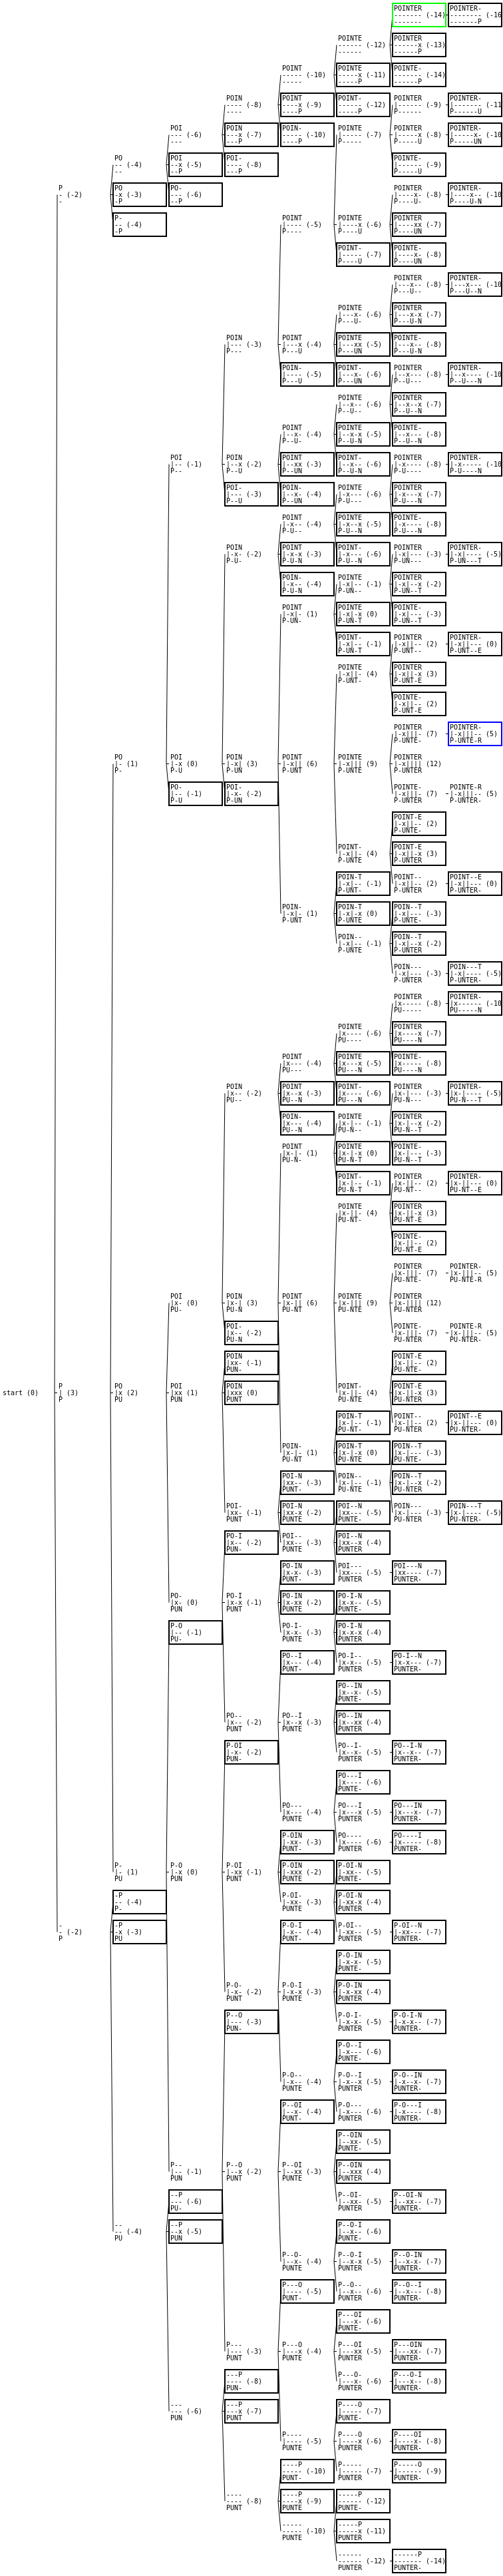

In [7]:
aln = Alignment(seq1="POINTER", seq2="PUNTER", vmatch=3, vmismatch=-1, vgap=-2)
algo = AlgorithmDynamicProgramming()
s = Simulation(aln, algo)
s.frame(max_steps=1000).img

In [4]:
aln.draw_text()

------------------------
Root node: 0 x 4
Box limits: [0 x 0] - [3 x 8]
------------------------
*: <nl>start (0)<nl> (0 x 4) 
*.1:   A<nl>- (-2)<nl>- (1 x 1) 
*.1.1:     AB<nl>-- (-4)<nl>-- (2 x 0) 
*.1.1.1:       AB-<nl>--- (-6)<nl>--A (3 x 0) [#000000]
*.1.2:     AB<nl>-x (-3)<nl>-A (2 x 1) [#000000]
*.1.3:     A-<nl>-- (-4)<nl>-A (2 x 2) [#000000]
*.2:   A<nl>| (3)<nl>A (1 x 4) 
*.2.1:     AB<nl>|- (1)<nl>A- (2 x 3) 
*.2.1.1:       AB-<nl>|-- (-1)<nl>A-X (3 x 3) [#0000ff]
*.2.2:     AB<nl>|x (2)<nl>AX (2 x 4) 
*.2.3:     A-<nl>|- (1)<nl>AX (2 x 5) 
*.2.3.1:       A-B<nl>|-- (-1)<nl>AX- (3 x 5) 
*.3:   -<nl>- (-2)<nl>A (1 x 7) 
*.3.1:     -A<nl>-- (-4)<nl>A- (2 x 6) [#000000]
*.3.2:     -A<nl>-x (-3)<nl>AX (2 x 7) [#000000]
*.3.3:     --<nl>-- (-4)<nl>AX (2 x 8) [#00ff00]
*.3.3.1:       --A<nl>--- (-6)<nl>AX- (3 x 8) [#000000]


In [5]:
assert False

AssertionError: 

# Align a Trivial Sequence

First we create an alignment (`aln`) by defining:

1. The sequences to be aligned:
    - AB
    - AX

2. The scoring scheme:
    - $MATCH == 3$
    - $MISMATCH == -1$
    - $GAP == -2$

In [ ]:
aln = Alignment(seq1="AB", seq2="AX", vmatch=3, vmismatch=-1, vgap=-2)

Then we create an instance (`algo_greddy`) of the greedy algorithm that we'll use to perform the simulation:

In [ ]:
aln.coords

In [ ]:
algo_greddy = AlgorithmGreedy()

Finally we create an instance (`s`) of the simulation engine:

In [ ]:
s_greedy = Simulation(aln, algo_greddy)

Now we can play with the simulation to visualize, for example, the state of the Greedy Algorithm
after 3 steps:

In [ ]:
s_greedy.frame(max_steps=3).img

To visualize the evolution of the algorithm we can create a "movie", i.e., the sequence of frames
from the first 3 steps the algorihtm:

In [ ]:
movie = s_greedy.movie(max_steps=3)

In the first step there is no alignment yet:

In [ ]:
movie.get_frames(0).img

In the second step, the first node is expanded into the 3 possible operations:
- A __GAP__ in the bottom sequence.
- A __MATCH__ between $Seq1_1$ and $Seq2_1$.
- A __GAP__ in the yop sequence.

In [ ]:
movie.get_frames(1).img

In the third step, the best node of the previous step (green box) is expanded again into the 3
possible operations. In this case a solution was found (blue box).

Remember this is a Greedy Algorithm, hence __the solution found is not guarantee to be the optimal
one__, i.e. the best possible.

In [ ]:
movie.get_frames(2).img

Let's try the Brute Force algorithm :

In [ ]:
algo_bf = AlgorithmBruteForce()

# get a new instance of the simulation engine
s_bf = Simulation(aln, algo_bf)

# run the first 100 steps (i.e. a number big enough to get a solution)
frame = s_bf.frame(max_steps=100)

We can now check of a solution was found before the 100 steps:

In [ ]:
print(f"Number of steps to align '{aln._seq1}' and '{aln._seq2}': {frame.steps}")

Inspecting the last step of the Brute Force algorithm we can see that optimal solution is actualy
the one that was found by the geedy algorithm above:

In [ ]:
frame.img

# Generating the Images for the POST

Bellow is the code to generate the images used in the post [How to Compare Text with Sequence
Alignment Algorithms - Part 3](https://jaclx5.github.io/sequence_alignments_3).

## Aligning `POINTER` and `PUNTER` with a Greedy Algorithm

In [ ]:
# define the alignment sequence and scoring scheme
aln = Alignment("POINTER", "PUNTER", 3, -1, -2)

# get an instance of the algorithm to use
ag = AlgorithmGreedy()

# get an instance of the simulation engine
s = Simulation(aln, ag)

In [ ]:
# generate the images until the solution
s.movie(max_steps=100).save(os.path.join(PATH_OUTPUT, "greedy1"))

## Aligning `ABC` and `ABXABC` with a Greedy Algorithm

In [ ]:
# define the alignment sequence and scoring scheme
aln = Alignment("ABC", "ABXABC", 3, -1, -2)

# get an instance of the algorithm to use
ag = AlgorithmGreedy()

# get an instance of the simulation engine
s = Simulation(aln, ag)

s.movie(max_steps=15).save(os.path.join(PATH_OUTPUT, "greedy2"))

## Aligning `ABC` and `ABXABC` with a Brute Force Algorithm

In [ ]:
N_STEPS = 2000

# define the alignment sequence and scoring scheme
aln = Alignment("ABC", "ABXABC", 3, -1, -2)

# get an instance of the algorithm to use
algo = AlgorithmBruteForce()

# get an instance of the simulation engine
s = Simulation(aln, algo)

f = s.frame(max_steps=N_STEPS)

assert f.end, f"{N_STEPS} steps are not enough to find the solution!"

print(f"Solution found after {f.steps}!")

f.img.save(os.path.join(PATH_OUTPUT, "full_brute_force.png"))